# Relative Strength Index - Technical Analysis for FaceBook

Coded by Aida Hasanova 

12 February 2021

In [1]:
pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import pandas_datareader as web

In [4]:
import matplotlib.pyplot as plt
import datetime as dt

ticker="FB"
start=dt.datetime(2018,1,1)
end=dt.datetime.now()

data=web.DataReader(ticker, "yahoo", start, end)
print(data)

                  High         Low        Open       Close    Volume  \
Date                                                                   
2018-01-02  181.580002  177.550003  177.679993  181.419998  18151900   
2018-01-03  184.779999  181.330002  181.880005  184.669998  16886600   
2018-01-04  186.210007  184.100006  184.899994  184.330002  13880900   
2018-01-05  186.899994  184.929993  185.589996  186.850006  13574500   
2018-01-08  188.899994  186.330002  187.199997  188.279999  17994700   
...                ...         ...         ...         ...       ...   
2021-02-08  269.859985  265.000000  268.750000  266.579987  13755200   
2021-02-09  273.390015  265.750000  266.440002  269.450012  14613400   
2021-02-10  273.799988  267.720001  272.450012  271.869995  14687200   
2021-02-11  273.579987  268.489990  271.890015  270.390015  12828600   
2021-02-12  271.179993  268.339996  270.519989  270.500000   9069100   

             Adj Close  
Date                    
2018-01-02  1

In [5]:
delta= data["Adj Close"].diff(1)

In [6]:
delta.dropna(inplace=True)

In [7]:
positive=delta.copy()
negative=delta.copy()

In [8]:
positive[positive<0]=0
negative[negative>0]=0

In [9]:
days=14

In [10]:
average_gain=positive.rolling(window=days).mean()
average_loss=abs(negative.rolling(window=days).mean())

In [11]:
relative_strength=average_gain/average_loss

In [12]:
RSI=100-(100/(1+relative_strength))

In [13]:
combined=pd.DataFrame()

In [14]:
combined["Adj Close"]=data["Adj Close"]

In [15]:
combined["RSI"]=RSI

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


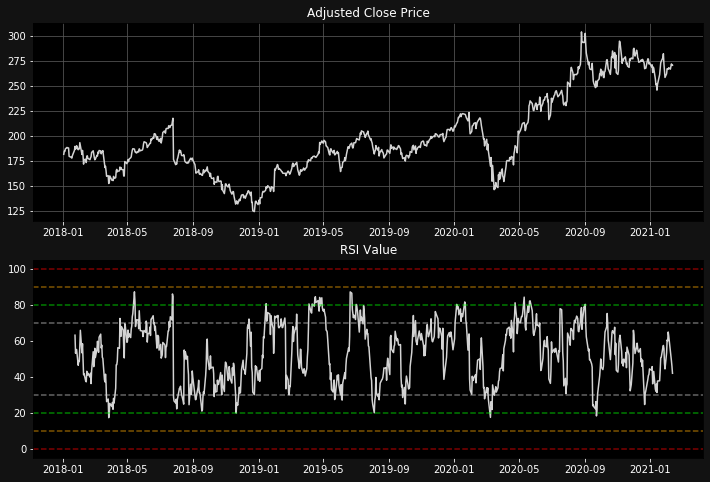

In [16]:
plt.figure(figsize=(12,8))
ax1=plt.subplot(211)
ax1.plot(combined.index, combined["Adj Close"], color="lightgray")

ax1.grid(True, color="#555555")
ax1.set_axisbelow(True)
ax1.set_facecolor("black")
ax1.figure.set_facecolor("#121212")
ax1.tick_params(axis="x", colors="white")
ax1.tick_params(axis="y", colors="white")
plt.title("Adjusted Close Price", fontdict=None, loc="center", pad=None, color="white")

ax2=plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined["RSI"], color="lightgray")
ax2.axhline(0, linestyle="--", alpha=0.5, color="#ff0000") 
ax2.axhline(10, linestyle="--", alpha=0.5, color="#ffaa00")
ax2.axhline(20, linestyle="--", alpha=0.5, color="#00ff00")
ax2.axhline(30, linestyle="--", alpha=0.5, color="#cccccc")
ax2.axhline(70, linestyle="--", alpha=0.5, color="#cccccc")
ax2.axhline(80, linestyle="--", alpha=0.5, color="#00ff00")
ax2.axhline(90, linestyle="--", alpha=0.5, color="#ffaa00")
ax2.axhline(100, linestyle="--", alpha=0.5, color="#ff0000")

plt.title("RSI Value", fontdict=None, loc="center", pad=None, color="white")
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor("black")
ax2.tick_params(axis="x", colors="white")
ax2.tick_params(axis="y", colors="white")
